In [56]:
!pip install tensorflow

In [57]:
# TensorFlow and Keras for deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# For handling the dataset
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping


In [58]:
 print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


#Example

## Load Data

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Explore the Data

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
First training label: 5


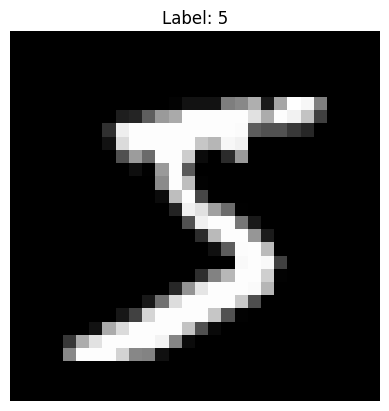

In [ ]:
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("First training label:", train_labels[0])

# Visualize one image
plt.imshow(train_images[0], cmap="gray")
plt.title(f"Label: {train_labels[0]}")
plt.axis("off")
plt.show()


## Preprocess the Data

### Neural networks learn better with normalized inputs. Flattening is needed for a basic fully-connected model.

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the images from (28,28) to (784,)
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

## Build the model

### Dense means a fully connected layer.

### First layer has 128 neurons with ReLU activation.

### Output layer has 10 neurons (for digits 0–9) with softmax to output probabilities.

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])


## Compile the Model

### Adam optimizer adjusts weights during training.sparse_categorical_crossentropy is used for integer labels. Accuracy helps evaluate the model.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

### Trains the model for 5 passes (epochs) over the entire training set.
### Batch size 32 means weights are updated every 32 samples.

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=32)


Epoch 1/5
1067/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8545 - loss: 0.5324

KeyboardInterrupt: 

## Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


In [ ]:
predictions = model.predict(test_images)
print("Prediction for first test image:", np.argmax(predictions[0]))


#Extenden cifar100

## Load Data

In [ ]:
from tensorflow.keras.datasets import cifar100
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


## Explore the Data

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Training labels shape: (50000, 1)
First training label: [19]


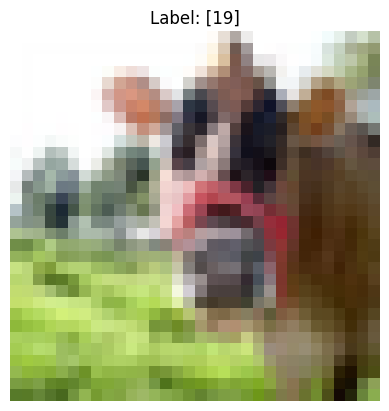

In [ ]:
print("Training data shape:", train_images.shape)
print("Testing data shape:", test_images.shape)
print("Training labels shape:", train_labels.shape)
print("First training label:", train_labels[0])

# Visualize one image
plt.imshow(train_images[0], cmap="gray")
plt.title(f"Label: {train_labels[0]}")
plt.axis("off")
plt.show()


## Preprocess the Data

### Neural networks learn better with normalized inputs. Flattening is needed for a basic fully-connected model.

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the images from (28,28) to (784,)
train_images = train_images.reshape((50000, 32 * 32 * 3))
test_images = test_images.reshape((10000, 32 * 32 * 3))

## Build the model

### Dense means a fully connected layer.

### First layer has 128 neurons with ReLU activation.

### Output layer has 10 neurons (for digits 0–9) with softmax to output probabilities.

In [ ]:
rate = 0.1
model = keras.Sequential([
    layers.Dense(128*8, activation='relu', input_shape=(3072,)),#1
    keras.layers.Dropout(rate, noise_shape=None, seed=None),
    layers.Dense(128*4, activation='relu', input_shape=(3072,)),#2
    keras.layers.Dropout(rate, noise_shape=None, seed=None),
    layers.Dense(128*4, activation='relu', input_shape=(3072,)),#3
    keras.layers.Dropout(rate, noise_shape=None, seed=None),
    layers.Dense(128*2, activation='relu', input_shape=(3072,)),#4
    keras.layers.Dropout(rate, noise_shape=None, seed=None),
    layers.Dense(128*2, activation='relu', input_shape=(3072,)),#5
    keras.layers.Dropout(rate, noise_shape=None, seed=None),
    layers.Dense(128, activation='relu', input_shape=(3072,)),#6
    keras.layers.Dropout(rate, noise_shape=None, seed=None),
    layers.Dense(128, activation='relu', input_shape=(3072,)),#7
    keras.layers.Dropout(rate, noise_shape=None, seed=None),
    layers.Dense(128, activation='relu', input_shape=(3072,)),#8
    keras.layers.Dropout(rate, noise_shape=None, seed=None),
    layers.Dense(100, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Computed output size would be negative. Received `inputs shape=(None, 1, 1, 32)`, `kernel shape=(3, 3, 32, 32)`, `dilation_rate=[1 1]`.

## Compile the Model

### Adam optimizer adjusts weights during training.sparse_categorical_crossentropy is used for integer labels. Accuracy helps evaluate the model.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

### Trains the model for 5 passes (epochs) over the entire training set.
### Batch size 32 means weights are updated every 32 samples.

In [ ]:
early_stopping = EarlyStopping(monitor='accuracy', patience=8)
model.fit(train_images, train_labels, epochs=200, batch_size=64,callbacks=[early_stopping])


Epoch 1/200


ValueError: Input 0 of layer "conv2d_20" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 3072)

## Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


In [ ]:
predictions = model.predict(test_images)
print("Prediction for first test image:", np.argmax(predictions[0]))


#Extenden cifar10

## Load Data

In [59]:
from tensorflow.keras.datasets import cifar10
(train_images_cifar10, train_labels_cifar10), (test_images_cifar10, test_labels_cifar10) = cifar10.load_data()

## Explore the Data

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Training labels shape: (50000, 1)
First training label: [6]


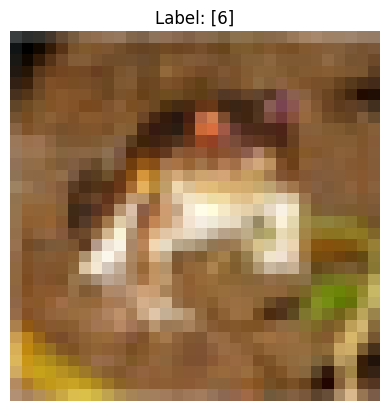

In [60]:
print("Training data shape:", train_images_cifar10.shape)
print("Testing data shape:", test_images_cifar10.shape)
print("Training labels shape:", train_labels_cifar10.shape)
print("First training label:", train_labels_cifar10[0])

# Visualize one image
# Note: CIFAR-10 images are color (3 channels), so cmap="gray" might not be appropriate.
# Removing cmap will show the image in color.
plt.imshow(train_images_cifar10[0])
plt.title(f"Label: {train_labels_cifar10[0]}")
plt.axis("off")
plt.show()

## Preprocess the Data

### Neural networks learn better with normalized inputs. Flattening is needed for a basic fully-connected model.

In [61]:
# Normalize pixel values to be between 0 and 1
train_images_cifar10 = train_images_cifar10 / 255.0
test_images_cifar10 = test_images_cifar10 / 255.0
# Flatten the images from (32,32,3) to (3072,)
train_images_cifar10 = train_images_cifar10.reshape((50000, 32 * 32 * 3))
test_images_cifar10 = test_images_cifar10.reshape((10000, 32 * 32 * 3))

## Build the model

### Dense means a fully connected layer.

### First layer has 128 neurons with ReLU activation.

### Output layer has 10 neurons (for digits 0–9) with softmax to output probabilities.

In [70]:
data_augmentation = keras.Sequential([
layers.RandomFlip("horizontal_and_vertical"),
layers.RandomRotation(0.2),
layers.RandomZoom(0.1),
layers.RandomContrast(0.1),
layers.RandomColorDegeneration(0.1),
layers.RandomTranslation(0.1, 0.1),
])

In [71]:
rate = 0.4
model = keras.Sequential([
    layers.Dense(128*4, activation='relu', input_shape=(3072,)),#1
    keras.layers.Dropout(rate, noise_shape=None, seed=None),
    layers.Dense(128*2 activation='relu', input_shape=(3072,)),#2
    keras.layers.Dropout(rate, noise_shape=None, seed=None),
    layers.Dense(128*2, activation='relu', input_shape=(3072,)),#3
    keras.layers.Dropout(rate, noise_shape=None, seed=None),
    # layers.Dense(128*4, activation='relu', input_shape=(3072,)),#4
    # keras.layers.Dropout(rate, noise_shape=None, seed=None),
    # layers.Dense(128*2, activation='relu', input_shape=(3072,)),#5
    # keras.layers.Dropout(rate, noise_shape=None, seed=None),
    # layers.Dense(128*2, activation='relu', input_shape=(3072,)),#6
    # keras.layers.Dropout(rate, noise_shape=None, seed=None),
    # layers.Dense(128, activation='relu', input_shape=(3072,)),#7
    # keras.layers.Dropout(rate, noise_shape=None, seed=None),
    layers.Dense(128, activation='relu', input_shape=(3072,)),#8
    keras.layers.Dropout(rate, noise_shape=None, seed=None),
    layers.Dense(10, activation='softmax')
])


## Compile the Model

### Adam optimizer adjusts weights during training.sparse_categorical_crossentropy is used for integer labels. Accuracy helps evaluate the model.

In [72]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

### Trains the model for 5 passes (epochs) over the entire training set.
### Batch size 32 means weights are updated every 32 samples.

In [73]:
early_stopping = EarlyStopping(monitor='accuracy', patience=15)
# Use the correct variable names for the CIFAR-10 dataset
model.fit(train_images_cifar10, train_labels_cifar10, epochs=200, batch_size=64,callbacks=[early_stopping])

Epoch 1/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1382 - loss: 2.3241
Epoch 2/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1947 - loss: 2.0951
Epoch 3/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2114 - loss: 2.0473
Epoch 4/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2279 - loss: 2.0270
Epoch 5/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2363 - loss: 2.0021
Epoch 6/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2441 - loss: 1.9911
Epoch 7/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2462 - loss: 1.9863
Epoch 8/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2430 - loss: 1.9787
Epoch 9/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2532 - loss: 1.9729
Epoch 10/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2560 - loss: 1.9711
Epoch 11/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2512 - loss: 1.9650
Epoch 12/200
782/782 ━━━━━━━━━━━━━━━━━━━━

## Evaluate the Model

In [74]:
test_loss, test_acc = model.evaluate(test_images_cifar10, test_labels_cifar10)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3748 - loss: 1.7609
Test accuracy: 0.37540000677108765


In [75]:
predictions = model.predict(test_images_cifar10)
print("Prediction for first test image:", np.argmax(predictions[0]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Prediction for first test image: 3


In [76]:
# prompt: exportar modelo de red neuronal a h5

# Guarda el modelo en formato HDF5
model.save('cifar10.keras')
print("Modelo guardado en cifar10.keras")

Modelo guardado en cifar10.keras


#Extenden text

## Load Data

In [ ]:
from tensorflow.keras.datasets import imdb
max_words = 10000
(train_sequences, train_labels), (test_sequences, test_labels) = imdb.load_data(num_words=max_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Explore the Data

In [ ]:
# Use the correct variable names for exploration
print("Training data shape:", train_sequences.shape)
print("Testing data shape:", test_sequences.shape)
print("Training labels shape:", train_labels.shape)
print("First training sequence:", train_sequences[0]) # Print the first sequence, not label

# Visualize one sequence (print the sequence itself)
print(train_sequences[0])

Training data shape: (25000,)
Testing data shape: (25000,)
Training labels shape: (25000,)
First training sequence: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283

## Preprocess the Data

### Neural networks learn better with normalized inputs. Flattening is needed for a basic fully-connected model.

In [ ]:
def multi_hot_encode_sequence(sequence, dimension):
    # Create an all-zero matrix of shape (dimension,) - Note: shape is just dimension, not len(sequence) x dimension
    results = np.zeros(dimension)
    for i in sequence:
        if i < dimension: # Ensure the index is within the vocabulary size
            # Set the index corresponding to the word to 1.0
            results[i] = 1.
    return results

# Flatten the images from (28,28) to (784,)

x_train = np.array([multi_hot_encode_sequence(s, max_words) for s in train_sequences])
x_test = np.array([multi_hot_encode_sequence(s, max_words) for s in test_sequences])

# Labels are already integers (0 or 1 for sentiment)
# y_train and y_test are already correctly loaded
y_train = np.array(train_labels)
y_test = np.array(test_labels)

print("Training data shape (after preprocessing):", x_train.shape)
print("Testing data shape (after preprocessing):", x_test.shape)

Training data shape (after preprocessing): (25000, 10000)
Testing data shape (after preprocessing): (25000, 10000)


## Build the model

### Dense means a fully connected layer.

### First layer has 128 neurons with ReLU activation.

### Output layer has 10 neurons (for digits 0–9) with softmax to output probabilities.

In [ ]:
rate = 0.4
model = keras.Sequential([
    # The input shape should now match the size of the multi-hot encoded vectors
    layers.Dense(128*8, activation='relu', input_shape=(max_words,)),#1
    keras.layers.Dropout(rate),
    layers.Dense(128*4, activation='relu', input_shape=(max_words,)),#1
    keras.layers.Dropout(rate),
    layers.Dense(1, activation='sigmoid') # Output layer for binary classification (sentiment)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model

### Adam optimizer adjusts weights during training.sparse_categorical_crossentropy is used for integer labels. Accuracy helps evaluate the model.

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Train the Model

### Trains the model for 5 passes (epochs) over the entire training set.
### Batch size 32 means weights are updated every 32 samples.

In [ ]:
early_stopping = EarlyStopping(monitor='accuracy', patience=8)
model.fit(x_train, y_train, epochs=200, batch_size=64,callbacks=[early_stopping])



Epoch 1/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8220 - loss: 0.3908
Epoch 2/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9418 - loss: 0.1541
Epoch 3/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9773 - loss: 0.0660
Epoch 4/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9906 - loss: 0.0284
Epoch 5/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9937 - loss: 0.0186
Epoch 6/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9951 - loss: 0.0154
Epoch 7/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9928 - loss: 0.0218
Epoch 8/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9960 - loss: 0.0132
Epoch 9/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9960 - loss: 0.0131
Epoch 10/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9961 - loss: 0.0114
Epoch 11/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9971 - loss: 0.0094
Epoch 12/200
391/391 ━━━━━━━━━━━━━━━━━━━━

## Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8637 - loss: 1.0107
Test accuracy: 0.8652399778366089


In [ ]:
predictions = model.predict(x_test)
# For binary classification, predictions are probabilities. You might want to threshold them.
print("Prediction for first test sample:", predictions[0]) # Probability of being positive sentiment
print("Predicted class for first test sample:", np.round(predictions[0])) # Predicted class (0 or 1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Prediction for first test sample: [7.2398475e-06]
Predicted class for first test sample: [0.]


In [ ]:
model.save('Text.keras')
print("Modelo guardado en Text.keras")

Modelo guardado en Text.keras


#Regression

## Load Data

In [ ]:
from tensorflow.keras.datasets import california_housing
(train_data, train_labels), (test_data, test_labels) = california_housing.load_data()

## Explore the Data

In [ ]:
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)
print("Training labels shape:", train_labels.shape)
print("First training label:", train_labels[0])




Training data shape: (16512, 8)
Testing data shape: (4128, 8)
Training labels shape: (16512,)
First training label: 252300.0


## Preprocess the Data

### Neural networks learn better with normalized inputs. Flattening is needed for a basic fully-connected model.

In [ ]:


# Flatten the images from (28,28) to (784,)
# train_images = train_images.reshape((50000, 32 * 32 * 3))
# test_images = test_images.reshape((10000, 32 * 32 * 3))

## Build the model

### Dense means a fully connected layer.

### First layer has 128 neurons with ReLU activation.

### Output layer has 10 neurons (for digits 0–9) with softmax to output probabilities.

In [ ]:
rate = 0.4
model = keras.Sequential([
    layers.Dense(128*4, activation='relu', input_shape=(train_data.shape[1],)),#1
    keras.layers.Dropout(rate, noise_shape=None, seed=None),
    layers.Dense(128*4, activation='relu'),#2
    keras.layers.Dropout(rate, noise_shape=None, seed=None),
    layers.Dense(128*2, activation='relu'),#3
    keras.layers.Dropout(rate, noise_shape=None, seed=None),
    # layers.Dense(128*4, activation='relu', input_shape=(3072,)),#4
    # keras.layers.Dropout(rate, noise_shape=None, seed=None),
    # layers.Dense(128*2, activation='relu', input_shape=(3072,)),#5
    # keras.layers.Dropout(rate, noise_shape=None, seed=None),
    # layers.Dense(128*2, activation='relu', input_shape=(3072,)),#6
    # keras.layers.Dropout(rate, noise_shape=None, seed=None),
    # layers.Dense(128, activation='relu', input_shape=(3072,)),#7
    # keras.layers.Dropout(rate, noise_shape=None, seed=None),
    # layers.Dense(128, activation='relu', input_shape=(3072,)),#8
    # keras.layers.Dropout(rate, noise_shape=None, seed=None),
    layers.Dense(1)
])


## Compile the Model

### Adam optimizer adjusts weights during training.sparse_categorical_crossentropy is used for integer labels. Accuracy helps evaluate the model.

In [ ]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

## Train the Model

### Trains the model for 5 passes (epochs) over the entire training set.
### Batch size 32 means weights are updated every 32 samples.

In [ ]:
early_stopping = EarlyStopping(monitor='mse', patience=8)
model.fit(train_data, train_labels, epochs=200, batch_size=32,callbacks=[early_stopping])


Epoch 1/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 26857359360.0000 - mse: 26857359360.0000
Epoch 2/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11274184704.0000 - mse: 11274184704.0000
Epoch 3/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10398608384.0000 - mse: 10398608384.0000
Epoch 4/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9439585280.0000 - mse: 9439585280.0000
Epoch 5/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8727663616.0000 - mse: 8727663616.0000
Epoch 6/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8364525056.0000 - mse: 8364525056.0000
Epoch 7/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8018718208.0000 - mse: 8018718208.0000
Epoch 8/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7745149952.0000 - mse: 7745149952.0000
Epoch 9/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7882950656.0000 - mse: 7882950656.0000
Epoch 10/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7651494400.0000 - mse: 765149440

## Evaluate the Model

In [ ]:
test_loss, test_mae = model.evaluate(test_data, test_labels)
print("Test loss (MSE):", test_loss)
print("Test accuracy (MAE):", test_mae) # Note: 'accuracy' isn't suitable for regression

# Make predictions
predictions = model.predict(test_data)
print("Prediction for first test sample:", predictions[0]) # Prediction is the predicted housing value

129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4828930560.0000 - mse: 4828930560.0000
Test loss (MSE): 4614983680.0
Test accuracy (MAE): 4614983680.0
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Prediction for first test sample: [185024.62]


In [40]:
model.save('Regression.keras')
print("Modelo guardado en Regression.keras")

NameError: name 'model' is not defined

#Streamlit

In [45]:
! pip install -q streamlit
! pip install pyngrok
from pyngrok import ngrok
ngrok.set_auth_token('2wT8R4HGkC4CTpuYtRmZNiNxQH4_3bxiSEb5jzzzcwyCu7wEb')
public_url = ngrok.connect(8501)

In [77]:
# prompt: quiero crear otro archivo app.py en donde se pueda probar los 3 modelos de redes neuronales, cifar 10, regression y extended text. los modelos están en archivos .keras . Quiero que haya 3 botones que te permitan subir una imagen y se haga la predicción de que imagen es, sepa si el texto es positivo o negativo o haga la regrasión del costo de la casa

%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image

# Load the models (assuming they are in the same directory or accessible)
@st.cache_resource
def load_models():
  cifar10_model = keras.models.load_model('cifar10.keras')
  text_model = keras.models.load_model('Text.keras')
  regression_model = keras.models.load_model('Regression.keras')
  return cifar10_model, text_model, regression_model

cifar10_model, text_model, regression_model = load_models()

# CIFAR-10 class names
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# IMDB word index for text preprocessing
# You'll need to load the word index to preprocess new text input
# This requires having the imdb word_index file.
# For simplicity in this example, we'll create a dummy index, but in a real app
# you'd load the actual one or use a Keras TextVectorization layer.
# If you saved the model including the TextVectorization layer, you might not need this.
# Assuming for this example you need the word_index for multi-hot encoding.
# You would typically load this from the IMDB dataset utils or a saved file.
# Example: word_index = imdb.get_word_index() # This downloads the index
# Or load from a saved file:
# import json
# with open('imdb_word_index.json', 'r') as f:
#     word_index = json.load(f)

# Dummy word index for demonstration (replace with actual if needed)
word_index = {k:(v+3) for k,v in tf.keras.datasets.imdb.get_word_index().items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
max_words = 10000 # Should match the max_words used during training

def multi_hot_encode_text(text, word_index, dimension):
    results = np.zeros(dimension)
    # Simple tokenization and lowercasing
    words = text.lower().split()
    for word in words:
        index = word_index.get(word, word_index["<UNK>"])
        if index < dimension:
            results[index] = 1.
    return results

st.title("Neural Network Model Testing")

st.sidebar.header("Choose a Model")
model_choice = st.sidebar.radio(
    "Select a model to test:",
    ('CIFAR-10 Image Classification', 'IMDB Text Sentiment Analysis', 'California Housing Regression')
)

if model_choice == 'CIFAR-10 Image Classification':
  st.header("CIFAR-10 Image Classification")
  st.write("Upload an image to predict its class.")

  uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

  if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Classifying...")

    # Preprocess the image for the model
    img_array = np.array(image.resize((32, 32))) # CIFAR-10 images are 32x32
    if img_array.shape[-1] == 4: # Handle RGBA images
      img_array = img_array[..., :3] # Discard alpha channel
    img_array = img_array / 255.0
    img_array = img_array.flatten().reshape(1, -1) # Flatten and reshape for the model

    predictions = cifar10_model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class = cifar10_classes[predicted_class_index]
    confidence = np.max(predictions)

    st.write(f"Prediction: **{predicted_class}** with confidence **{confidence:.2f}**")

elif model_choice == 'IMDB Text Sentiment Analysis':
  st.header("IMDB Text Sentiment Analysis")
  st.write("Enter text to predict its sentiment (positive or negative).")

  text_input = st.text_area("Enter your review text here:")

  if text_input:
    st.write("Analyzing sentiment...")

    # Preprocess the text for the model
    processed_text = multi_hot_encode_text(text_input, word_index, max_words)
    processed_text = processed_text.reshape(1, -1) # Reshape for the model

    prediction = text_model.predict(processed_text)
    sentiment_score = prediction[0][0] # The model outputs a single value (probability of positive)

    st.write(f"Sentiment Score: **{sentiment_score:.2f}**")

    if sentiment_score > 0.5:
        st.write("Predicted Sentiment: **Positive**")
    else:
        st.write("Predicted Sentiment: **Negative**")

elif model_choice == 'California Housing Regression':
  st.header("California Housing Regression")
  st.write("Enter house features to predict the median house value.")
  st.write("Please provide values for all 8 features:")

  # Input fields for the 8 features of the California Housing dataset
  # You'll need to know the order and meaning of the features for the input
  # Example Features (based on dataset documentation):
  # 0: MedInc (median income)
  # 1: HouseAge (median house age)
  # 2: AveRooms (average number of rooms)
  # 3: AveBedrms (average number of bedrooms)
  # 4: Population
  # 5: AveOccup (average house occupancy)
  # 6: Latitude
  # 7: Longitude

  medinc = st.number_input("Median Income", value=3.0, format="%.2f")
  houseage = st.number_input("Median House Age", value=20.0, format="%.1f")
  averooms = st.number_input("Average Number of Rooms", value=5.0, format="%.2f")
  avebedrms = st.number_input("Average Number of Bedrooms", value=1.0, format="%.2f")
  population = st.number_input("Population", value=1000.0, format="%.0f")
  aveoccup = st.number_input("Average House Occupancy", value=2.0, format="%.2f")
  latitude = st.number_input("Latitude", value=34.0, format="%.4f")
  longitude = st.number_input("Longitude", value=-118.0, format="%.4f")

  # Collect the features into a numpy array
  features = np.array([[medinc, houseage, averooms, avebedrms, population, aveoccup, latitude, longitude]])

  if st.button("Predict House Value"):
    st.write("Predicting...")

    prediction = regression_model.predict(features)
    predicted_value = prediction[0][0]

    st.write(f"Predicted Median House Value: **${predicted_value:.2f}**")



Overwriting app.py


In [78]:
!ngrok authtoken <2wT8R4HGkC4CTpuYtRmZNiNxQH4_3bxiSEb5jzzzcwyCu7wEb> #Replace <your_authtoken> with your actual authtoken from ngrok.com
public_url = ngrok.connect(8501) # Replace 8501 with the port your app is running on
print(public_url)

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `ngrok authtoken <2wT8R4HGkC4CTpuYtRmZNiNxQH4_3bxiSEb5jzzzcwyCu7wEb> #Replace <your_authtoken> with your actual authtoken from ngrok.com'
NgrokTunnel: "https://acb1-34-125-61-38.ngrok-free.app" -> "http://localhost:8501"


In [79]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
       "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://acb1-34-125-61-38.ngrok-free.app


In [80]:
!streamlit run app.py --browser.gatherUsageStats false


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.61.38:8501

2025-06-04 05:29:51.305322: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749014991.332879   32112 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749014991.341276   32112 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-04 05:29:55.343844: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1749014995.343991   32112 gpu_device